<a href="https://colab.research.google.com/github/YagmurrrCan/Pima-Indians-Diabetes-ML-Project/blob/main/PIMA_INDIANS_DIABETES_DATENSATZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PIMA INDIANS DIABETES DATENBANK**
## Vorhersage des Auftretens von Diabetes basierend auf diagnostischen Maßnahmen

### Kontext
Dieser Datensatz stammt ursprünglich vom National Institute of Diabetes and Digestive and Kidney Diseases. Das Ziel des Datensatzes ist die diagnostische Vorhersage, ob ein Patient Diabetes hat oder nicht, basierend auf bestimmten diagnostischen Messungen, die im Datensatz enthalten sind. Bei der Auswahl dieser Instanzen aus einer größeren Datenbank wurden mehrere Einschränkungen auferlegt. Insbesondere sind alle Patienten hier Frauen, die mindestens 21 Jahre alt sind und Pima-Indianer haben.

### Inhalt
Die Datensätze bestehen aus mehreren medizinischen Prädiktorvariablen und einer Zielvariablen, Outcome. Prädiktorvariablen umfassen die Anzahl der Schwangerschaften der Patientin, ihren BMI, ihren Insulinspiegel, ihr Alter usw. 


Quelle: https://www.kaggle.com/uciml/pima-indians-diabetes-database

## **BIBLIOTHEKEN IMPORTIEREN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
%matplotlib inline

## **Hochladen und Verstehen der Daten**

In [ ]:
diabetes_df = pd.read_csv("/content/sample_data/diabetes.csv")
#https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print("The shape of the dataset is : ", diabetes_df.shape)

The shape of the dataset is :  (768, 9)


In [ ]:
dict = {}
for i in list(diabetes_df.columns):
    dict[i] = diabetes_df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


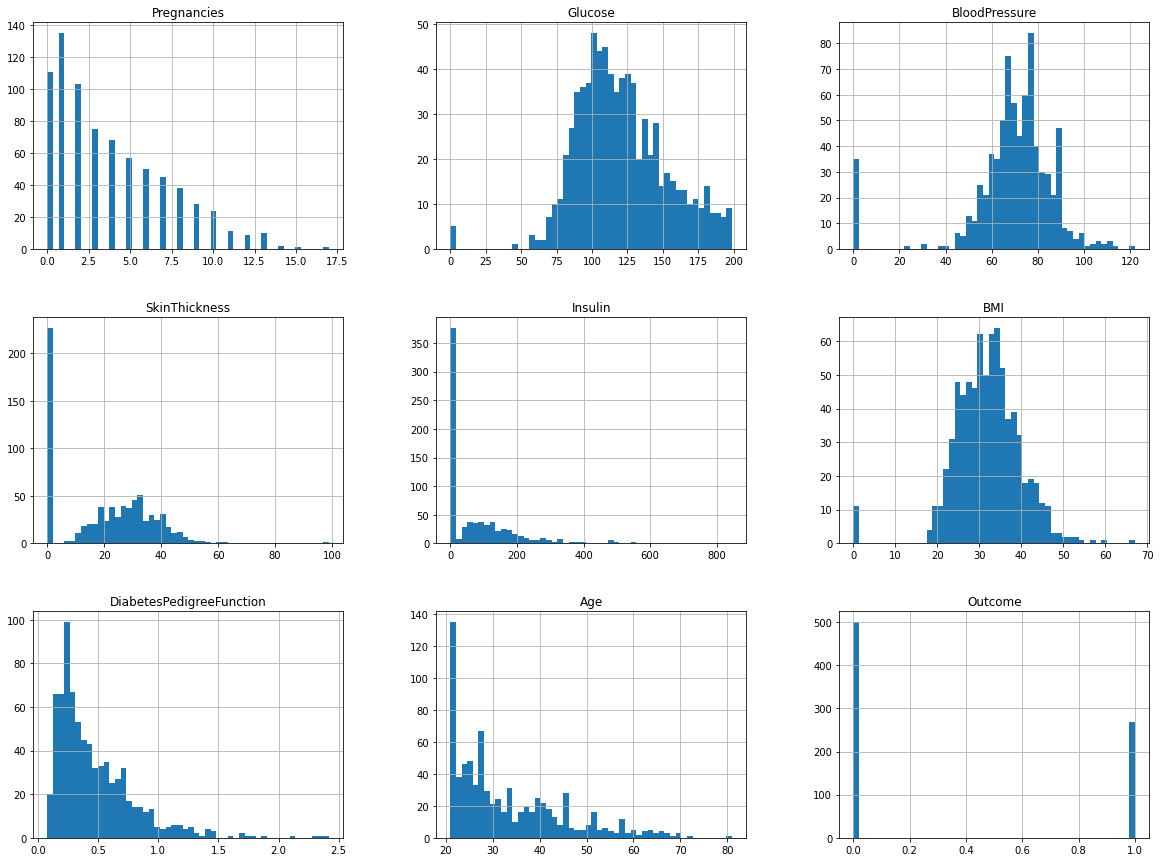

In [ ]:
diabetes_df.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
# ilerideki islemleri yapabilmek icin 0 yerine NaN konuldu
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] =  diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df_mean = diabetes_df.copy()
df_mean.fillna(method='ffill', inplace=True)
df_mean.fillna(method='bfill', inplace=True)
df_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,94.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,94.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,94.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df_mean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.514323,72.308594,29.257812,157.084635,32.482031,0.471876,33.240885,0.348958
std,3.369578,30.531191,12.375474,10.544310,114.159085,6.908600,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,78.750000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,130.000000,32.350000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,193.250000,36.725000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_mean.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

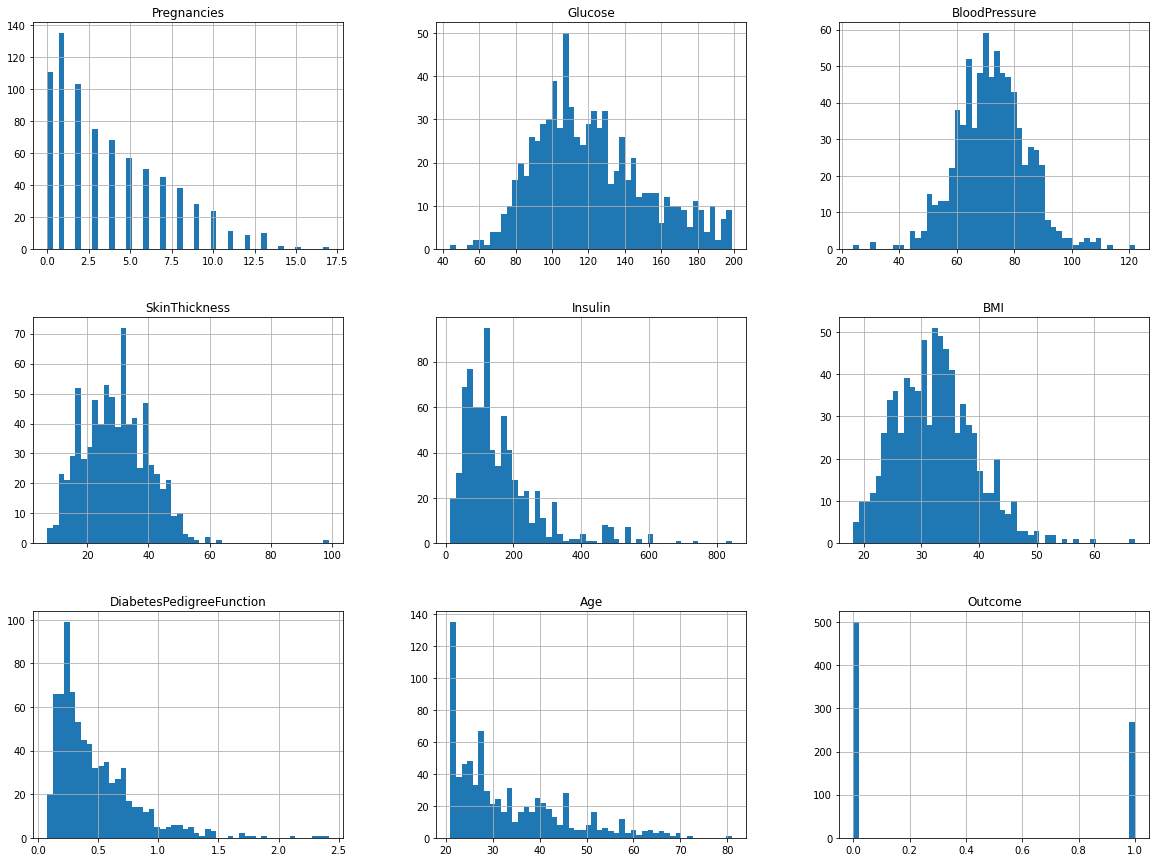

In [ ]:
df_mean.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

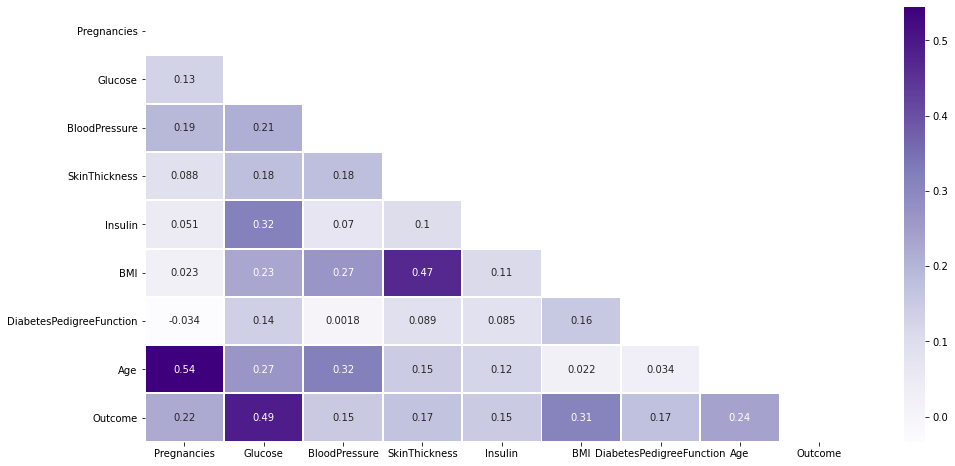

In [ ]:
plt.figure(figsize = (16, 8))

corr = df_mean.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1, cmap = "Purples")
plt.show()

## **Vorbereitung von Datensatz**

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X = df_mean.drop(['Outcome'],axis=1)
Y = df_mean['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape

(154, 8)

## **Skalierung des Datensatzes**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Daten Visualisierung**

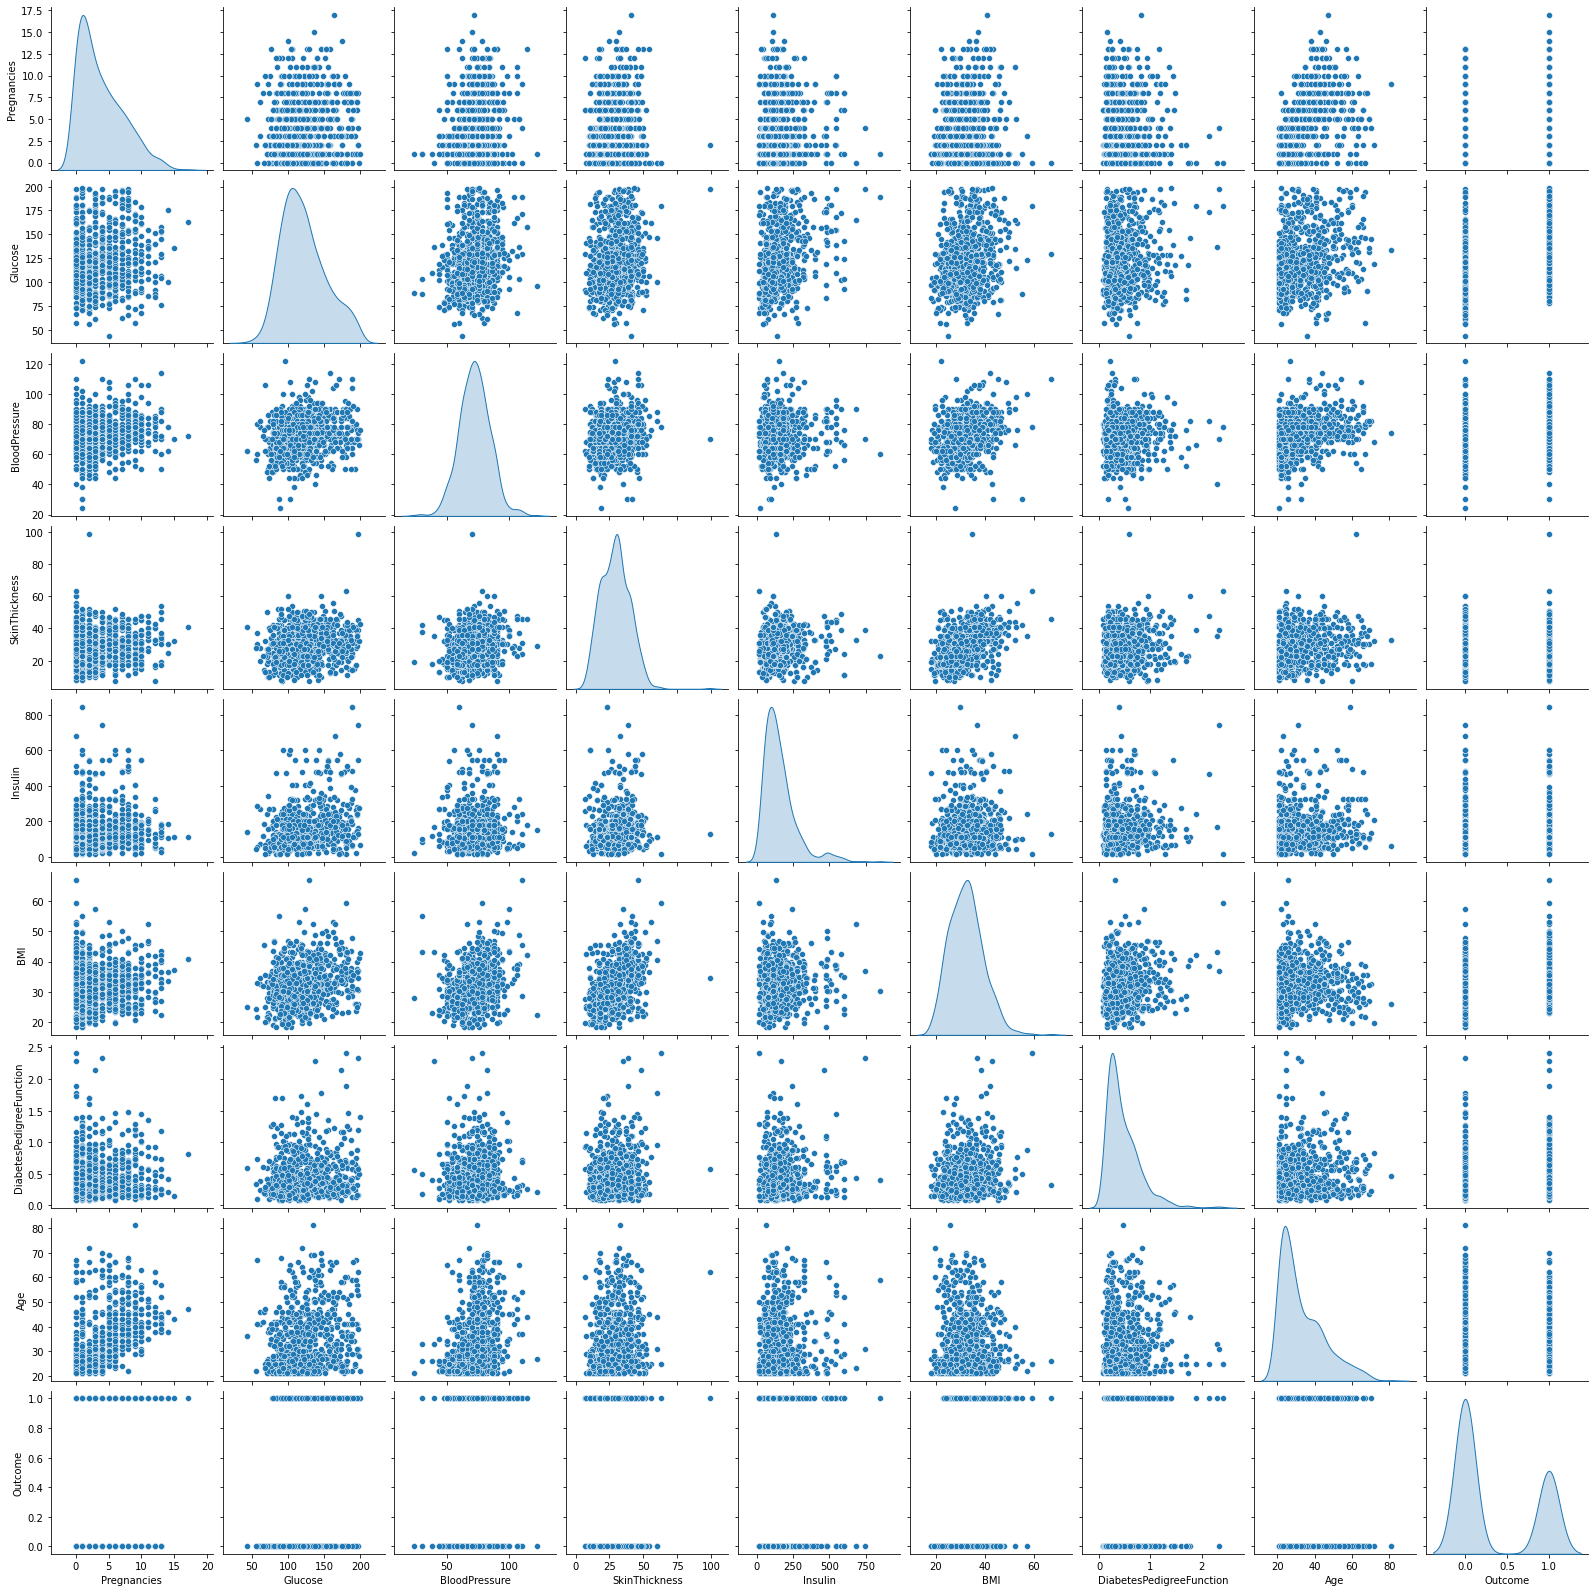

In [ ]:
sns.pairplot(df_mean,diag_kind='kde');

Text(0, 0.5, '')

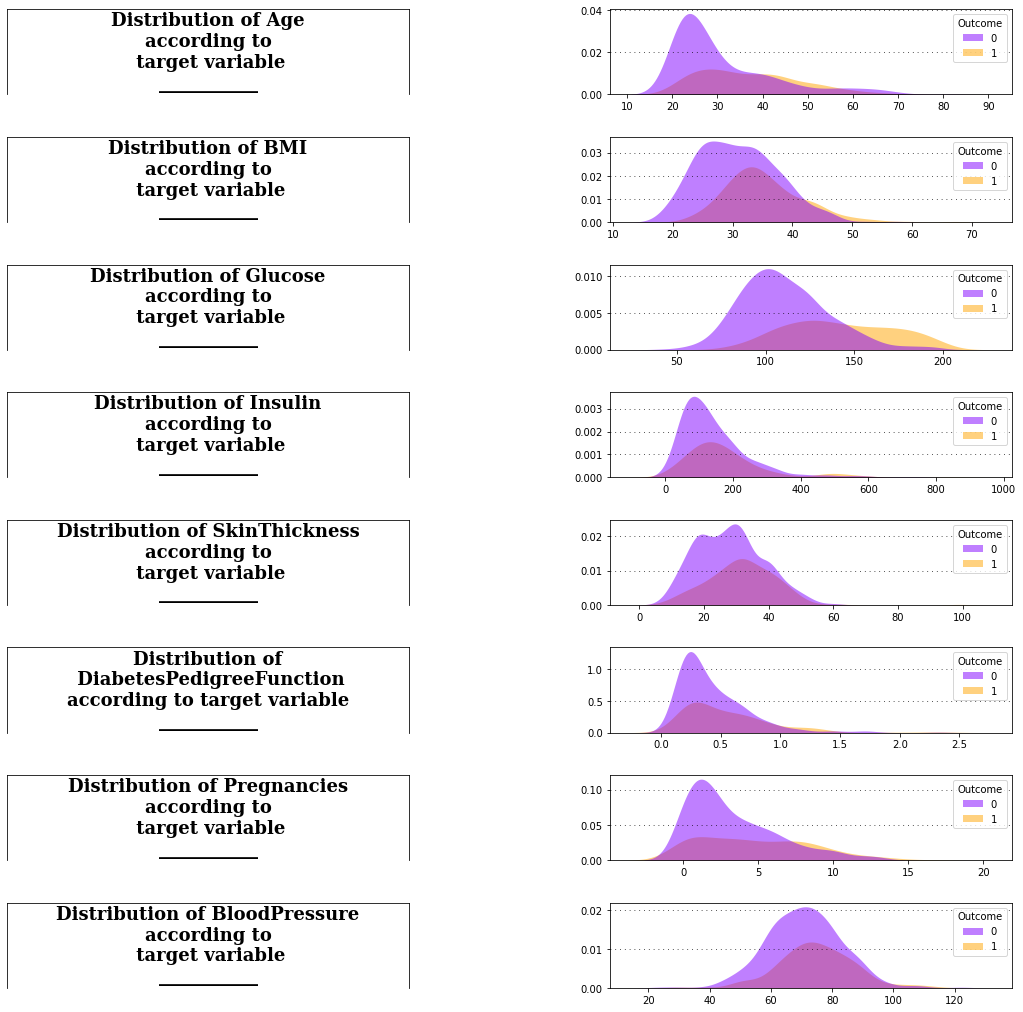

In [ ]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(8,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])
ax12 = fig.add_subplot(gs[6,0])
ax13 = fig.add_subplot(gs[6,1])
ax14 = fig.add_subplot(gs[7,0])
ax15 = fig.add_subplot(gs[7,1])

background_color = "#ffffff"  #ffe6e6
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)
ax12.set_facecolor(background_color)
ax13.set_facecolor(background_color)
ax14.set_facecolor(background_color)
ax15.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of Age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df_mean, x='Age',hue="Outcome", fill=True,palette=["#8000ff","orange"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# BMI title
ax2.text(0.5,0.5,"Distribution of BMI\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# BMI
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df_mean, x='BMI',hue="Outcome", fill=True,palette=["#8000ff","orange"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")


# Glucose title
ax4.text(0.5,0.5,"Distribution of Glucose\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Glucose
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df_mean, x='Glucose',hue="Outcome", fill=True,palette=["#8000ff","orange"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Insulin title
ax6.text(0.5,0.5,"Distribution of Insulin\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Insulin
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df_mean, x='Insulin',hue="Outcome", fill=True,palette=["#8000ff","orange"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# SkinThickness title
ax8.text(0.5,0.5,"Distribution of SkinThickness\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# SkinThickness
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df_mean, x='SkinThickness',hue="Outcome", fill=True,palette=["#8000ff","orange"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

# DiabetesPedigreeFunction title
ax10.text(0.5,0.5,"Distribution of\n DiabetesPedigreeFunction\naccording to target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)

# DiabetesPedigreeFunction
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax11, data=df_mean, x='DiabetesPedigreeFunction',hue="Outcome", fill=True,palette=["#8000ff","orange"], alpha=.5, linewidth=0)
ax11.set_xlabel("")
ax11.set_ylabel("")

# Pregnancies title
ax12.text(0.5,0.5,"Distribution of Pregnancies\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax12.spines["bottom"].set_visible(False)
ax12.set_xticklabels([])
ax12.set_yticklabels([])
ax12.tick_params(left=False, bottom=False)

# Pregnancies
ax13.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax13, data=df_mean, x='Pregnancies',hue="Outcome", fill=True,palette=["#8000ff","orange"], alpha=.5, linewidth=0)
ax13.set_xlabel("")
ax13.set_ylabel("")

#BloodPressure title
ax14.text(0.5,0.5,"Distribution of BloodPressure\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax14.spines["bottom"].set_visible(False)
ax14.set_xticklabels([])
ax14.set_yticklabels([])
ax14.tick_params(left=False, bottom=False)

# BloodPressure
ax15.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax15, data=df_mean, x='BloodPressure',hue="Outcome", fill=True,palette=["#8000ff","orange"], alpha=.5, linewidth=0)
ax15.set_xlabel("")
ax15.set_ylabel("")

In [ ]:
df_mean['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

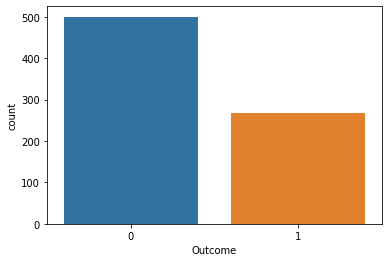

In [ ]:
sns.countplot(df_mean['Outcome'])

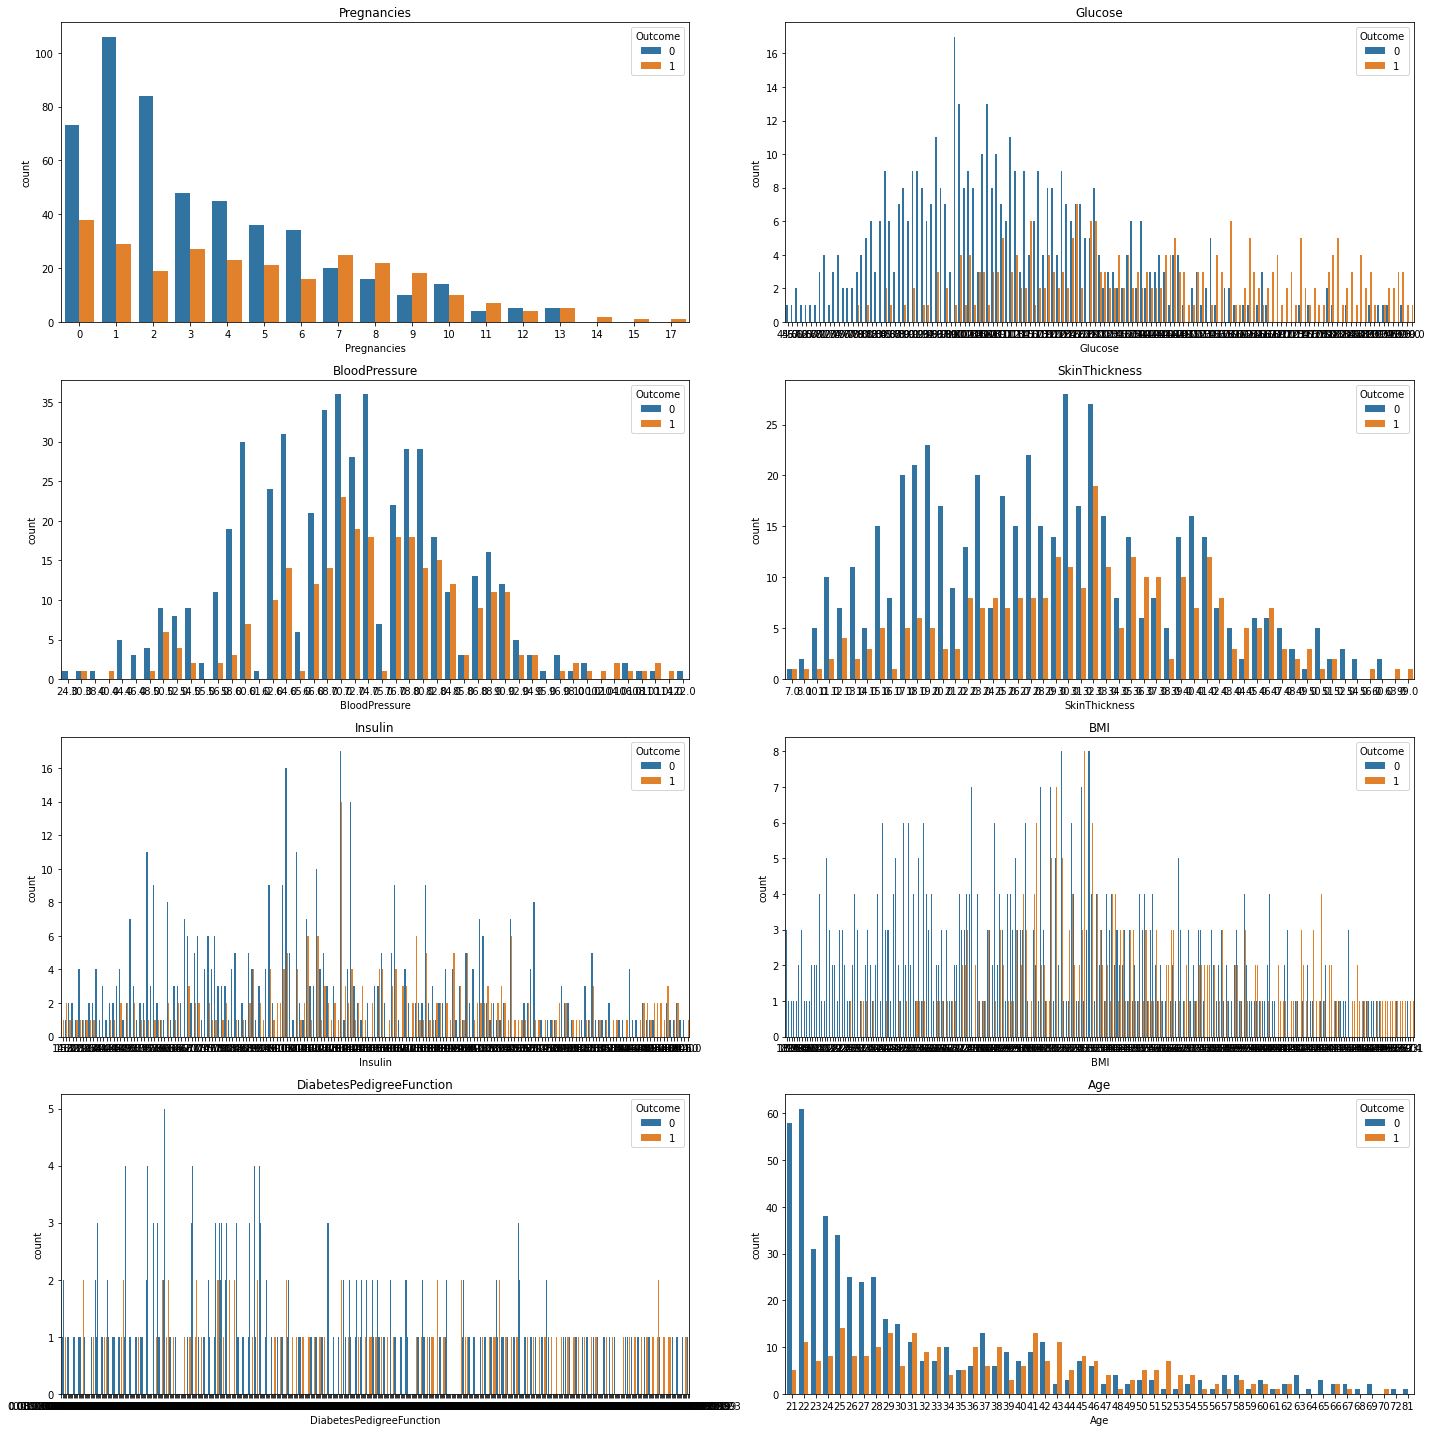

In [ ]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

n_rows = 4
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*10, n_rows*5))

for r in range(0, n_rows): 
  for c in range(0, n_cols):

    i = r*n_cols + c 
    ax = axs[r][c]
    sns.countplot(df_mean[cols[i]], hue=df_mean['Outcome'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='Outcome', loc= 'upper right')
  plt.tight_layout()

# **Modellierung**

**Es gibt vier Möglichkeiten, um zu überprüfen, ob die Vorhersagen richtig oder falsch sind: True Positive, True Negative, Falsch Positive, Falsch Negative.**

**Precision: Genauigkeit positiver Vorhersagen.** 

**Precision = TP / (TP + FP)**

**Recall : Recall ist die Fähigkeit eines Klassifikators, alle positiven** **Instanzen zu finden. Recall = TP / (TP + FN)**

**F1 Score: Die Punktzahlen geben die Genauigkeit der Klassifizierer bei der** **Klassifizierung von Datenpunkten in dieser Klasse im Vergleich zu allen** **anderen Klassen an. F1 Score = 2*(Recall * Precision) / (Recall + Precision)**

**Support: Support ist die Anzahl der tatsächlichen Vorkommen der Klasse im angegebenen Dataset.**

## **Logistic Regression**

Logistic Regression Training Accuracy: 0.7736156351791531
Logistic Regression Test Score: 0.7532467532467533


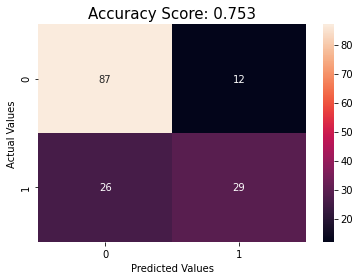

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
  
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)
  

print('Logistic Regression Training Accuracy:', log.score(X_train, y_train))

y_pred_logistic = log.predict(X_test)
acc_logistic = accuracy_score(y_test, y_pred_logistic)
print('Logistic Regression Test Score:', acc_logistic)

predictions = log.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0', '1']
print(classification_report(y_test, y_pred_logistic, target_names=target_names))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        99
           1       0.71      0.53      0.60        55

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



## **KNeighborsClassifier**

K Nearest Neighbor Training Accuracy: 0.8110749185667753
K Nearest Neighbor Test Score: 0.7922077922077922


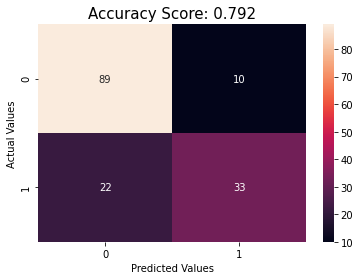

In [ ]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p = 2)
knn.fit(X_train, y_train)

print('K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))

y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print('K Nearest Neighbor Test Score:', acc_knn)

predictions = knn.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0', '1']
print(classification_report(y_test, y_pred_knn, target_names=target_names))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        99
           1       0.77      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



## **Support Vector Machine**

Support Vector Machine Training Accuracy: 0.8224755700325733
SVC Method Test Score: 0.7987012987012987


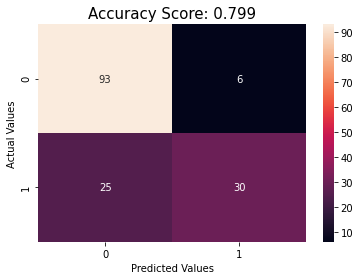

In [ ]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

print('Support Vector Machine Training Accuracy:', svc.score(X_train, y_train))
y_pred_svm=svc.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print('SVC Method Test Score:', accuracy_score(y_test, y_pred_svm))

predictions = svc.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0', '1']
print(classification_report(y_test, y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        99
           1       0.83      0.55      0.66        55

    accuracy                           0.80       154
   macro avg       0.81      0.74      0.76       154
weighted avg       0.80      0.80      0.79       154



## **Decision Tree Classifier**

Decision Tree Classifier Training Accuracy: 1.0
Decision Tree Classifier Test Score: 0.6818181818181818


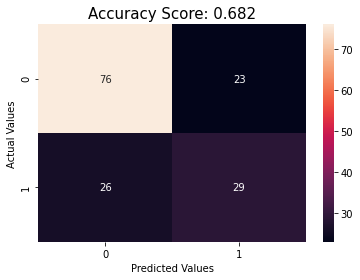

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
tree.fit(X_train, y_train)

print('Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))

y_pred_dt = tree.predict(X_test)
print('Decision Tree Classifier Test Score:', accuracy_score(y_test, y_pred_dt))

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

predictions = tree.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0', '1']
print(classification_report(y_test, y_pred_dt, target_names=target_names))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        99
           1       0.56      0.53      0.54        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



## **Random Forest Classifier**

Random Forest Classifier Training Accuracy: 0.990228013029316
Random Forest Classifier Test Score: 0.7532467532467533


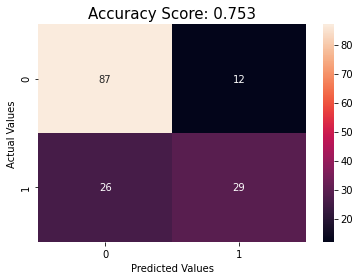

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

print('Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))

y_pred_rf = forest.predict(X_test)
print('Random Forest Classifier Test Score:', accuracy_score(y_test, y_pred_rf))

predictions = forest.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

target_names = ['0', '1']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        99
           1       0.71      0.53      0.60        55

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



# **Grid search**

## **RandomForest mit GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4],
    'max_features': [4, 5],
    'min_samples_leaf': [5, 6, 7, 8],
    'min_samples_split': [7, 8, 9, 10],
    'n_estimators': [100, 150, 200]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
forest = RandomForestClassifier(n_estimators = 150, bootstrap=True, max_depth=4, max_features=5, min_samples_leaf=8, min_samples_split=9)
forest.fit(X_train, y_train)

# print('Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))

y_pred_forest = forest.predict(X_test)
acc_forest = accuracy_score(y_test, y_pred_forest)
print('Random Forest Classifier Test Score:', acc_forest) 

Random Forest Classifier Test Score: 0.7857142857142857


## **SVM GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [0.1, 1, 10., 30., 100., 300.]},
        {'kernel': ['rbf'], 'C': [0.01, 0.1, 1.0, 3.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svc = SVC()
grid_search_svm = GridSearchCV(svc, param_grid, scoring='neg_mean_squared_error', verbose=2)
grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   0.0s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.1s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.1s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.1s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.1s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.1s
[CV] C=100.0, kernel=linear ..........................................
[CV] ........................... C=100.0, kernel=linear, total=   0.2s
[CV] C=100.0, kernel=linear ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    5.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10.0, 30.0, 100.0, 300.0],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1.0, 3.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
negative_mse = grid_search_svm.best_score_
rmse = np.sqrt(-negative_mse)
rmse

0.4791814069205642

In [ ]:
grid_search_svm.best_params_

{'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
svc = SVC(C=1.0, kernel='rbf', gamma=0.01)
svc.fit(X_train, y_train)

print('Support Vector Machine Training Accuracy:', svc.score(X_train, y_train))
y_pred=svc.predict(X_test)
print('SVC Method Test Score:', accuracy_score(y_test, y_pred))

Support Vector Machine Training Accuracy: 0.7703583061889251
SVC Method Test Score: 0.7597402597402597


## **KNN GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5], 'p': [1, 2, 3, 4]}]

knn_clf = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_clf, param_grid, verbose=3)
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] . n_neighbors=3, p=1, weights=uniform, score=0.740, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] . n_neighbors=3, p=1, weights=uniform, score=0.707, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] . n_neighbors=3, p=1, weights=uniform, score=0.707, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] . n_neighbors=3, p=1, weights=uniform, score=0.707, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] . n_neighbors=3, p=1, weights=uniform, score=0.746, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV]  n_neighbors=3, p=1, weights=distance, score=0.732, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV]  n_neighbors=3, p=1, weights=distance, score=0.707, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV]  n_neighbors=3, p=1, weights=distance, score=0.707, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV]  n_neighbors=3, p=1, weights=distance, score=0.707, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV]  n_neighbors=3, p=1, weights=distance, score=0.746, total=   0.0s
[CV] n_neighbors=3, p=2, weights=uniform .............................
[CV] . n_neighbors=3, p=2, weights=uniform, score=0.740, total=   0.0s
[CV] n_neighbors=3, p=2, weights=uniform .............................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [3, 4, 5], 'p': [1, 2, 3, 4],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_search_knn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, p=1, weights='uniform')
knn.fit(X_train, y_train)

# print('K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))

y_pred = knn.predict(X_test)
print('K Nearest Neighbor Test Score:', accuracy_score(y_test, y_pred))

K Nearest Neighbor Test Score: 0.7662337662337663


## **Decision Tree GridSearch**##


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

dtree_model=DecisionTreeClassifier()
grid_search = GridSearchCV(dtree_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:    5.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [ ]:
d_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=3, min_samples_split=2)
d_tree.fit(X_train, y_train)

y_pred_tree = d_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, y_pred_tree)
print('Decision Tree Classifier Test Score:', acc_decision_tree)

Decision Tree Classifier Test Score: 0.7792207792207793


# **Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(random_state = 0)
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=3, min_samples_split=2, random_state= 0)
rnd_clf = RandomForestClassifier(n_estimators = 150, bootstrap=True, max_depth=4, max_features=5, min_samples_leaf=8, min_samples_split=9, random_state=0)
svm_clf = SVC(random_state = 0, probability=True)
knn_clf = KNeighborsClassifier()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', tree_clf), ('rf', rnd_clf), ('svc', svm_clf), ('knn', knn_clf)],
    voting='soft')

In [ ]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                              

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, tree_clf, rnd_clf, svm_clf, knn_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7532467532467533
DecisionTreeClassifier 0.7792207792207793
RandomForestClassifier 0.7857142857142857
SVC 0.7987012987012987
KNeighborsClassifier 0.7922077922077922


In [ ]:
y_pred_voting = voting_clf.predict(X_test)
acc_voting = accuracy_score(y_test, y_pred_voting)
acc_voting

0.8116883116883117

## **ROC Curve**

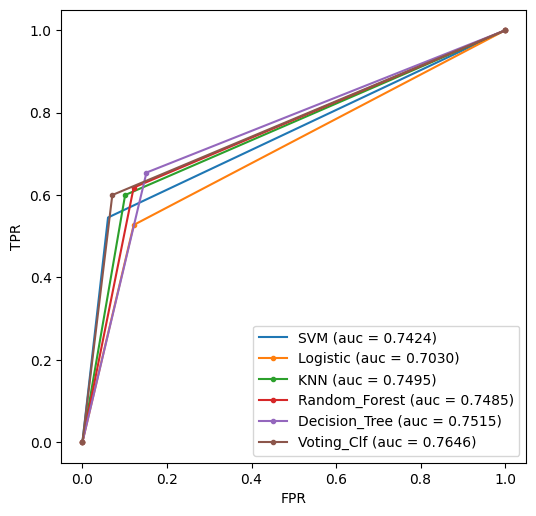

In [ ]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, treshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, treshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

knn_fpr, knn_tpr, treshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

forest_fpr, forest_tpr, treshold = roc_curve(y_test, y_pred_forest)
auc_forest = auc(forest_fpr, forest_tpr)

tree_fpr, tree_tpr, treshold = roc_curve(y_test, y_pred_tree)
auc_tree = auc(tree_fpr, tree_tpr)

voting_fpr, voting_tpr, treshold = roc_curve(y_test, y_pred_voting)
auc_voting = auc(voting_fpr, voting_tpr)

plt.figure(figsize=(6,6), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label= 'SVM (auc = %0.4f)' %auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.4f)' % auc_logistic)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (auc = %0.4f)' % auc_knn)
plt.plot(forest_fpr, forest_tpr, marker='.', label='Random_Forest (auc = %0.4f)' % auc_forest)
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision_Tree (auc = %0.4f)' % auc_tree)
plt.plot(voting_fpr, voting_tpr, marker='.', label='Voting_Clf (auc = %0.4f)' % auc_voting)

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.show()

# **Zusammenfassung**

In [ ]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','SVM','K - Nearest Neighbors', 'Decision Tree', 'Random Forest', 
              'Voting Classifier'],
    'Score': [acc_logistic, acc_svm, acc_knn, acc_decision_tree, acc_forest, acc_voting]})

models.sort_values(by='Score', ascending=False)

,Model,Score
5,Voting Classifier,0.811688
1,SVM,0.798701
2,K - Nearest Neighbors,0.792208
4,Random Forest,0.785714
3,Decision Tree,0.779221
0,LogisticRegression,0.753247


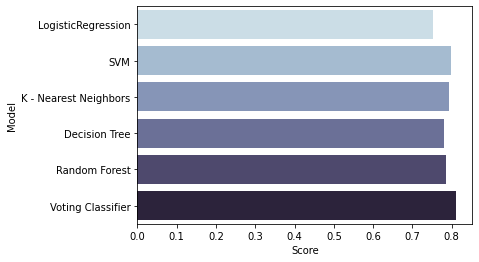

In [ ]:
sns.barplot(x = models['Score'], y = models['Model'], palette="ch:s=.25,rot=-.25");